In [2]:
import torch
import pandas as pd
import numpy as np

In [11]:
if [1]:
    print(1)

1


In [8]:
np.exp(-0.8)

0.44932896411722156

In [14]:
epochs = np.arange(100)

In [9]:
train_data = np.load("datasets/weatherbench_6hour_offline/means_stds_pixelnorm.npy")

In [11]:
np.min(train_data)

-3.32913351786477

In [40]:
delta_data = (train_data[1:] - train_data[:-1])
norm_data = np.sqrt(np.sum(delta_data**2,axis=(1,2,3)))
#norm_data = norm_data/norm_data.mean()

In [42]:
norm_data[:-1].mean()

8.033047

In [41]:
norm_data.mean()

8.042866

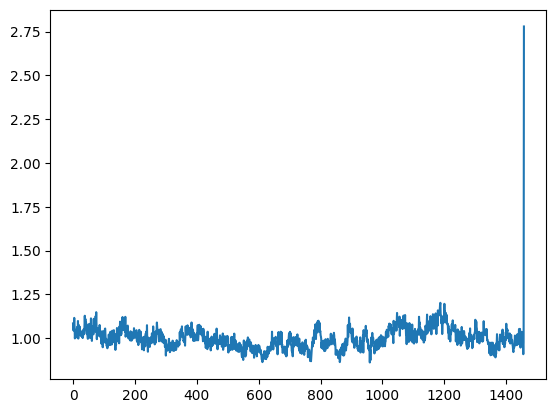

In [39]:
%matplotlib inline
plt.plot(norm_data)

In [23]:
delta_step =norm_data[:-1]/norm_data[1:]

In [24]:
from mltool.visualization import *

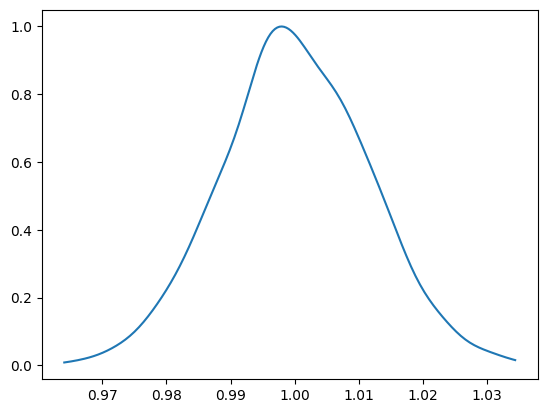

In [25]:
smoothhist(delta_step)

In [34]:
norm_data[-1]

2.4260402

In [35]:
norm_data[-2]

0.9380386

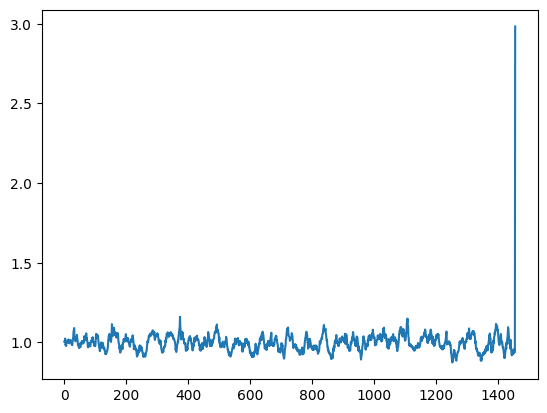

In [3]:
sH = 720
sW = 1440
tH = 32
tW = 64
steph = sH /float(tH)
stepw = sW /float(tW)
x     = np.arange(0, sW, stepw).astype('int')
y     = np.linspace(0, sH-1, tH, dtype='int')
x, y  = np.meshgrid(x, y)

latitude   = np.linspace(90,-90,721)
longitude  = np.linspace(0,360,1440)

LaLotude = np.stack([latitude[y],longitude[x]])/180*np.pi

LaLotudeVector = np.stack([np.cos(LaLotude[1])*np.cos(LaLotude[0]),np.cos(LaLotude[1])*np.sin(LaLotude[0]),np.sin(LaLotude[1])],2)

In [6]:
timelists = np.arange(np.datetime64("1979-01-02"), np.datetime64("2017-01-01"), np.timedelta64(6, "h"))

In [16]:
import datetime

In [26]:
sun_vector = np.stack([np.cos(sun_lat/180*np.pi)*np.cos(sun_lon/180*np.pi),
                    np.cos(sun_lat/180*np.pi)*np.sin(sun_lon/180*np.pi),
                    np.sin(sun_lat/180*np.pi)])

In [31]:
mask=(LaLotudeVector@sun_vector)

In [32]:
mask[0,45]

0.37799625648571333

In [33]:
LaLotudeVector[0,45]@sun_vector

0.37799625648571333

In [28]:
sun_vector.shape

(3,)

In [25]:
sun_lon, sun_lat = get_sub_sun_point(a.item())

In [22]:
import math

In [10]:
a = timelists[0]

In [ ]:
a.

In [7]:
delta_data = train_data[1:] - train_data[:-1]

In [8]:
delta_data = delta_data.astype('float64')

In [9]:
mean = delta_data.mean(0)

In [11]:
stds = delta_data.std(0)

In [14]:
mean_stds = np.stack([mean,stds])

In [16]:
np.save("datasets/weatherbench_6hour_offline/delta_means_stds_pixelnorm.npy",mean_stds)

In [225]:
%%writefile run_script/create_2D68K_offline.py
import numpy as np

train_data = np.load("datasets/weatherbench_6hour_offline/train_2D70N.npy").astype('float64')
train_data = train_data[:,list(range(0,14*4-1))+list(range(14*4,14*5-1))]

valid_data = np.load("datasets/weatherbench_6hour_offline/valid_2D70N.npy").astype('float64')
valid_data = valid_data[:,list(range(0,14*4-1))+list(range(14*4,14*5-1))]
test_data = np.load("datasets/weatherbench_6hour_offline/test_2D70N.npy").astype('float64')
test_data = test_data[:,list(range(0,14*4-1))+list(range(14*4,14*5-1))]

mean_pixelnorm = train_data.mean(0)
stds_pixelnorm = train_data.std(0)
means_stds_pixelnorm = np.stack([mean_pixelnorm,stds_pixelnorm])
np.save("datasets/weatherbench_6hour_offline/means_stds_pixelnorm.npy", means_stds_pixelnorm)

train_data_half = (train_data - mean_pixelnorm)/(stds_pixelnorm+1e-10)
train_data_half = train_data_half.astype('float16')
np.save("datasets/weatherbench_6hour_offline/train_2D68K_pixelnorm.npy",train_data_half)

valid_data_half = (valid_data - mean_pixelnorm)/(stds_pixelnorm+1e-10)
valid_data_half = valid_data_half.astype('float16')
np.save("datasets/weatherbench_6hour_offline/valid_2D68K_pixelnorm.npy", valid_data_half)
test_data_half = (test_data - mean_pixelnorm)/(stds_pixelnorm+1e-10)
test_data_half = test_data_half.astype('float16')
np.save("datasets/weatherbench_6hour_offline/test_2D68K_pixelnorm.npy", test_data_half)

Writing run_script/create_2D68K_offline.py


True
False


In [45]:
line  = data[:,49,7,15].astype('float')

In [22]:
from mltool.visualization import *

In [ ]:
time_features(pd.to_datetime(times)

In [37]:
def func(T,w11,w21,w31,w41,w12,w22,w32,w42,o11,o21,o31,o41,o12,o22,o32,o42):
    return ( w11*np.sin(2*np.pi*T.hour/24 + o11)       + w12*np.cos(2*np.pi*T.hour/24 + o12) +
             w21*np.sin(2*np.pi*T.dayofweek/7 + o21)   + w22*np.cos(2*np.pi*T.dayofweek/7 + o22) +
             w31*np.sin(2*np.pi*T.day/31 + o31)        + w32*np.cos(2*np.pi*T.day/31 + o32) +
             w41*np.sin(2*np.pi*T.dayofyear/366 + o41) + w42*np.cos(2*np.pi*T.dayofyear/366 + o42))

In [41]:
from scipy.optimize import curve_fit

In [49]:
xdata = timestamp[:-1]
ydata = line

In [50]:
popt, pcov = curve_fit(func, xdata, ydata)

In [55]:
pcov.shape

(16, 16)

In [51]:
from mltool.visualization import *

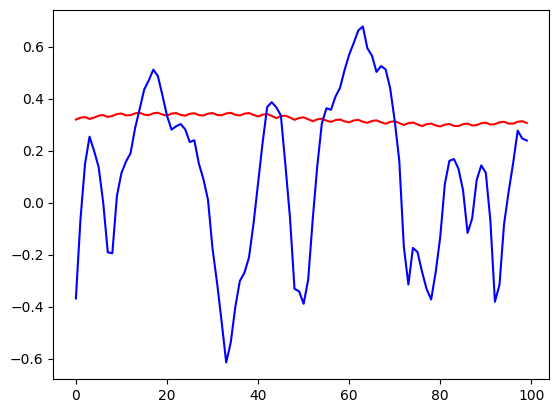

In [53]:
%matplotlib inline
start = 100
plt.plot(func(xdata[start:start+100], *popt), 'r-')
plt.plot(ydata[start:start+100], 'b-', label='data')

In [12]:
import scipy

In [47]:
import scipy.fft as fft

In [54]:
fft_line = fft.rfft(line,norm="ortho")

In [80]:
(fft.rfftfreq(len(line))*len(line))[-150:].astype('int')

array([27608, 27609, 27610, 27611, 27612, 27613, 27614, 27615, 27616,
       27617, 27618, 27619, 27620, 27621, 27622, 27623, 27624, 27625,
       27626, 27627, 27628, 27629, 27630, 27631, 27632, 27633, 27634,
       27635, 27636, 27637, 27638, 27639, 27640, 27641, 27642, 27643,
       27644, 27645, 27646, 27647, 27648, 27649, 27650, 27651, 27652,
       27653, 27654, 27655, 27656, 27657, 27658, 27659, 27660, 27661,
       27662, 27663, 27664, 27665, 27666, 27667, 27668, 27669, 27670,
       27671, 27672, 27673, 27674, 27675, 27676, 27677, 27678, 27679,
       27680, 27681, 27682, 27683, 27684, 27685, 27686, 27687, 27688,
       27689, 27690, 27691, 27692, 27693, 27694, 27695, 27696, 27697,
       27698, 27699, 27700, 27701, 27702, 27703, 27704, 27705, 27706,
       27707, 27708, 27709, 27710, 27711, 27712, 27713, 27714, 27715,
       27716, 27717, 27718, 27719, 27720, 27721, 27722, 27723, 27724,
       27725, 27726, 27727, 27728, 27729, 27730, 27731, 27732, 27733,
       27734, 27735,

In [88]:
print(len(line)//1)
print(len(line)//1)
print(len(line)//(24/6))
print(len(line)//(24*7/6))
print(len(line)//(24*30/6))
print(len(line)//(24*366/6))

55514
55514
13878.0
1982.0
462.0
37.0


In [94]:
fake_fft_line = np.zeros_like(fft_line)
fake_fft_line[-10:] = fft_line[-10:]
for mid in  [13878, 1982,462,37]:
    fake_fft_line[mid-10:mid+10] = fft_line[mid -10:mid+10]
fake_fft_line[0]=fft_line[0]

In [95]:
reconstruct = fft.irfft(fake_fft_line,n=len(line),norm="ortho")

In [121]:
reserve_freq = np.argsort(abs(fft_line))[-5000:]
fake_fft_line = np.zeros_like(fft_line)
fake_fft_line[reserve_freq] = fft_line[reserve_freq]
reconstruct = fft.irfft(fake_fft_line,n=len(line),norm="ortho")

In [122]:
reconstruct

array([ 0.15472035,  0.02968823, -0.0213942 , ...,  0.03790627,
        0.19149126,  0.24010597])

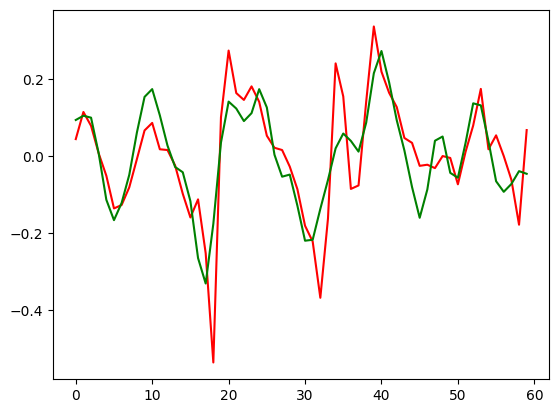

In [123]:
%matplotlib inline
start=300
plt.plot(line[start:start+60],'r')
plt.plot(reconstruct[start:start+60],'g')

In [56]:
reconstruct

array([0.00099793, 0.00100946, 0.00102101, ..., 0.00096344, 0.00097492,
       0.00098642])

In [34]:
delta_std[55]=1
delta_std[69]=1

In [36]:
delta_mean_std = np.stack([delta_mean,delta_std])

In [39]:
np.save("datasets/weatherbench_6hour/delta_mean_std.npy",delta_mean_std)

In [35]:
np.load("datasets/weatherbench_6hour/mean_std.npy").shape

(2, 110)

In [1]:
import torch
import numpy as np

In [14]:
a = torch.ones(1,5)
b = torch.ones(1,10)
c = torch.arange(10).reshape(1,10)
layer = torch.nn.Linear(5,10)
layer.load_state_dict(torch.load("debug/test.weight"))

<All keys matched successfully>

In [15]:
torch.save(layer.state_dict(),'debug/test.weight')

In [16]:
torch.nn.MSELoss()(b+c,layer(a)+c).backward()

In [17]:
layer.weight.grad

tensor([[-3.1168e-01, -3.1168e-01, -3.1168e-01, -3.1168e-01, -3.1168e-01],
        [ 1.0257e-02,  1.0257e-02,  1.0257e-02,  1.0257e-02,  1.0257e-02],
        [-4.6965e-02, -4.6965e-02, -4.6965e-02, -4.6965e-02, -4.6965e-02],
        [ 2.4194e-02,  2.4194e-02,  2.4194e-02,  2.4194e-02,  2.4194e-02],
        [-4.9562e-01, -4.9562e-01, -4.9562e-01, -4.9562e-01, -4.9562e-01],
        [-1.2085e-01, -1.2085e-01, -1.2085e-01, -1.2085e-01, -1.2085e-01],
        [-3.5114e-01, -3.5114e-01, -3.5114e-01, -3.5114e-01, -3.5114e-01],
        [-3.4697e-01, -3.4697e-01, -3.4697e-01, -3.4697e-01, -3.4697e-01],
        [-2.1173e-01, -2.1173e-01, -2.1173e-01, -2.1173e-01, -2.1173e-01],
        [-2.8019e-04, -2.8019e-04, -2.8019e-04, -2.8019e-04, -2.8019e-04]])

In [13]:
layer.weight.grad

tensor([[-3.1168e-01, -3.1168e-01, -3.1168e-01, -3.1168e-01, -3.1168e-01],
        [ 1.0257e-02,  1.0257e-02,  1.0257e-02,  1.0257e-02,  1.0257e-02],
        [-4.6965e-02, -4.6965e-02, -4.6965e-02, -4.6965e-02, -4.6965e-02],
        [ 2.4194e-02,  2.4194e-02,  2.4194e-02,  2.4194e-02,  2.4194e-02],
        [-4.9562e-01, -4.9562e-01, -4.9562e-01, -4.9562e-01, -4.9562e-01],
        [-1.2085e-01, -1.2085e-01, -1.2085e-01, -1.2085e-01, -1.2085e-01],
        [-3.5114e-01, -3.5114e-01, -3.5114e-01, -3.5114e-01, -3.5114e-01],
        [-3.4697e-01, -3.4697e-01, -3.4697e-01, -3.4697e-01, -3.4697e-01],
        [-2.1173e-01, -2.1173e-01, -2.1173e-01, -2.1173e-01, -2.1173e-01],
        [-2.8021e-04, -2.8021e-04, -2.8021e-04, -2.8021e-04, -2.8021e-04]])

In [3]:
from cephdataset import WeathBench7066PatchDataset

In [42]:
a=torch.randn(5,14)
b=a.reshape(1,70)
c=a.flatten(0,1)

In [43]:
torch.dist(b,c)

tensor(0.)

In [38]:
dataset_flag = "2D70N"
flag = "valid"

kargs={'dataset_flag':dataset_flag ,
 'root': "datasets/weatherbench_6hour",
 'mode': 'pretrain',
 'time_step': 2,
 'check_data': True,
 'time_reverse_flag': 'only_forward',
 'time_intervel': 1,
 'cross_sample': 0,
 'random_dataset': 0, 
 'use_offline_data':2,'with_idx':True,
 'patch_range':5}
dataset1 = WeathBench7066PatchDataset(split=flag,**kargs)

use offline data mode <2>: train/valid/test use offline data
use dataset in datasets/weatherbench_6hour
load data from datasets/weatherbench_6hour/valid_2D70N.npy
notice we will use around_index(28, 64, 2, 5, 5) to patch data


In [14]:
print(dataset1[0][0])
dataset1[0][1][0].shape

0


torch.Size([70, 32, 64])

In [39]:
dataset_flag = "2D70N"
flag = "test"

kargs={'dataset_flag':dataset_flag ,
 'root': "datasets/weatherbench_6hour",
 'mode': 'pretrain',
 'time_step': 2,
 'check_data': True,
 'time_reverse_flag': 'only_forward',
 'time_intervel': 1,
 'cross_sample': 0,
 'random_dataset': 0, 
 'use_offline_data':2,'with_idx':True,
 'patch_range':5}
dataset2 = WeathBench7066PatchDataset(split=flag,**kargs)

use offline data mode <2>: train/valid/test use offline data
use dataset in datasets/weatherbench_6hour
load data from datasets/weatherbench_6hour/test_2D70N.npy
notice we will use around_index(28, 64, 2, 5, 5) to patch data


In [15]:
for idx,(a,b) in enumerate(zip(dataset1[0][1][0],dataset2[0][1][0])):
    delta = torch.dist(a,b).item()
    if delta > 1e-4:print(f"{idx:3d} -> {delta}")

 55 -> 0.009417231448110746
 69 -> 0.025083986984419517


In [41]:
torch.dist(dataset1[0][1][0][55] - (dataset1[0][1][0][55][0][0]  - dataset2[0][1][0][55][0][0] ),dataset2[0][1][0][55])

tensor(0.)

In [34]:
dataset1[0][1][0][55][0] 

tensor([-0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394,
        -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394,
        -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394,
        -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394,
        -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394,
        -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394,
        -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394,
        -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394, -0.6394],
       dtype=torch.float64)

In [27]:
dataset2[0][1][0][55]

tensor([[-0.6396, -0.6396, -0.6396,  ..., -0.6396, -0.6396, -0.6396],
        [-0.6396, -0.6396, -0.6396,  ..., -0.6396, -0.6396, -0.6396],
        [-0.6396, -0.6396, -0.6396,  ..., -0.6396, -0.6396, -0.6396],
        ...,
        [-0.6396, -0.6396, -0.6396,  ..., -0.6396, -0.6396, -0.6396],
        [-0.6396, -0.6396, -0.6396,  ..., -0.6396, -0.6396, -0.6396],
        [-0.6396, -0.6396, -0.6396,  ..., -0.6396, -0.6396, -0.6396]])

In [23]:
torch.dist(torch.round(dataset1[0][1][0],decimals=0),torch.round(dataset2[0][1][0],decimals=0))

tensor(5.2915, dtype=torch.float64)

In [6]:
torch.dist(dataset1[0][0],dataset2[0][0])

tensor(0.0268, dtype=torch.float64)

In [13]:
data = dataset.dataset_tensor
data = data*dataset.mean_std[1].reshape(1,110,1,1) + dataset.mean_std[0].reshape(1,110,1,1)

In [14]:
_component_list= ([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,  1]+ # u component of wind and the 10m u wind
                    [71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,  2] # v component of wind and the 10m v wind
)

In [15]:
volecity = data[:,_component_list].reshape(1460,2,14,32,64)

In [17]:
sixhourvolecity = volecity*3.6

In [20]:
from mltool.visualization import *

In [21]:
vdata =  sixhourvolecity[:,0].flatten().numpy()

In [23]:
smoothhist(vdata)

In [24]:
plt.show()

In [11]:
center_h = np.random.randint(dataset.img_shape[-2] - (dataset.patch_range//2)*2) 
center_w = np.random.randint(dataset.img_shape[-1])

In [12]:
patch_idx_h, patch_idx_w = dataset.around_index[center_h, center_w]

In [13]:
dataset.around_index.shape

(28, 64, 2, 5, 5)

In [14]:
data = torch.arange(32*64).reshape(1,1,32,64)

In [16]:
data[...,patch_idx_h, patch_idx_w]

tensor([[[[368, 369, 370, 371, 372],
          [432, 433, 434, 435, 436],
          [496, 497, 498, 499, 500],
          [560, 561, 562, 563, 564],
          [624, 625, 626, 627, 628]]]])

In [3]:
import numpy as np

In [50]:
dataloader = torch.utils.data.DataLoader(dataset,batch_size=3)

In [58]:
class RandomSelectPatchFetcher:
    def __init__(self,data_loader,device):
        dataset = data_loader.dataset
        assert dataset.use_offline_data  
        self.data  = dataset.dataset_tensor #(B,70,32,64)
        self.batch_size = data_loader.batch_size 
        self.patch_range= dataset.patch_range
        self.img_shape  = dataset.img_shape
        self.around_index = dataset.around_index
        self.length = len(dataset)
        self.time_step = dataset.time_step
        self.device = device
    def next(self):
        center_h = np.random.randint(self.patch_range//2, self.img_shape[-2] - (self.patch_range//2)*2,size=(self.batch_size,)) 
        center_w = np.random.randint(self.img_shape[-1],size=(self.batch_size,))
        patch_idx = self.around_index[center_h, center_w] #(B,2,5,5) 
        patch_idx_h = patch_idx[:,0]#(B,5,5)
        patch_idx_w = patch_idx[:,1]#(B,5,5)
        batch_idx = np.random.randint(self.length,size=(self.batch_size,)).reshape(self.batch_size,1,1) #(B,1,1)
        return [self.data[batch_idx+i,:,patch_idx_h,patch_idx_w].to(self.device) for i in range(self.time_step)]

In [99]:
fetcher.data = torch.arange(8*2*32*64).reshape(8,2, 32, 64)

In [100]:
# center_h = np.random.randint(fetcher.patch_range//2, fetcher.img_shape[-2] - (fetcher.patch_range//2)*2,size=(fetcher.batch_size)) 
# center_w = np.random.randint(fetcher.img_shape[-1],size=(fetcher.batch_size))
center_h = np.array([1,2,4])
center_w = np.array([2,2,4])
patch_idx = fetcher.around_index[center_h, center_w] #(B,5,5) (B,5,5)
patch_idx_h = patch_idx[:,0]
patch_idx_w = patch_idx[:,1]
batch_idx = batch_idx = np.array([1,2,3]).reshape(3,1,1)

In [101]:
a,b = [fetcher.data[batch_idx+i,:,patch_idx_h,patch_idx_w].to(fetcher.device) for i in range(fetcher.time_step)]

In [ ]:
np.random.randint(

In [37]:
batch_idx = np.stack([np.ones((5,5))*1,np.ones((5,5))*2])

In [42]:
batch_idx = np.array([1,2]).reshape(2,1,1)

In [45]:
batch_idx.shape

(2, 1, 1)

In [23]:
import torch

In [47]:
torch.dist(dataset_tensor[batch_idx,:,patch_idx_h, patch_idx_w][0],
           dataset_tensor[batch_idx[0,0,0],:,patch_idx_h[0], patch_idx_w[0]].permute(1,2,0))

tensor(0.)

In [48]:
torch.dist(dataset_tensor[batch_idx,:,patch_idx_h, patch_idx_w][1],
           dataset_tensor[batch_idx[1,0,0],:,patch_idx_h[1], patch_idx_w[1]].permute(1,2,0))

tensor(0.)

torch.Size([70, 5, 5])

In [15]:
def get_center_around_indexes(patch_range,img_shape):
    hlist   = range(patch_range//2, img_shape[-2] - (patch_range//2))
    wlist   = range(img_shape[-1])
    xes,yes = np.meshgrid(hlist,wlist)
    coor    = np.stack([xes,yes],-1).reshape(-1,2)
    indexes = np.array([np.stack(get_patch_location_index([x,y],img_shape,patch_range)) for x,y in coor] )
    indexes = indexes.reshape(len(wlist),len(hlist),2,patch_range,patch_range).transpose(1,0,2,3,4)
    coor    = coor.reshape(len(wlist),len(hlist),2).transpose(2,1,0)
    return coor, indexes

# WeatherBench

In [2]:
import os
import numpy as np

In [3]:
DATAROOT="/nvme/zhangtianning/datasets/weatherbench/weatherbench32x64"

In [4]:
years = os.listdir(DATAROOT)

In [4]:
def init_file_list(years):
    file_list = []
    for year in years:
        if year == 1979: # 1979年数据只有8753个，缺少第一天前7小时数据，所以这里我们从第二天开始算起
            for hour in range(17, 8753, 1):
                file_list.append([year, hour])
        else:
            if year % 4 == 0:
                max_item = 8784
            else:
                max_item = 8760
            for hour in range(0, max_item, 1):
                file_list.append([year, hour])
    return file_list

In [10]:
yearhourslist=init_file_list([1979])

In [11]:
data = []
for year, hour in yearhourslist:
    url = f"{DATAROOT}/{year}/{year}-{hour:04d}.npy"
    data.append(np.load(url))

In [12]:
data=np.stack(data)

In [13]:
data.shape

(8736, 110, 32, 64)

In [16]:
multi_level_vnames = [
    "z", "t", "q", "r", "u", "v", "vo", "pv",
]
single_level_vnames = [
    "t2m", "u10", "v10", "tcc", "tp", "tisr",
]
long2shortname_dict = {"geopotential": "z", 
                       "temperature": "t", 
                       "specific_humidity": "q", 
                       "relative_humidity": "r", 
                       "u_component_of_wind": "u", 
                       "v_component_of_wind": "v", 
                       "vorticity": "vo", 
                       "potential_vorticity": "pv", 
                "2m_temperature": "t2m", 
                "10m_u_component_of_wind": "u10", 
                "10m_v_component_of_wind": "v10", 
                "total_cloud_cover": "tcc",
                "total_precipitation": "tp", 
                "toa_incident_solar_radiation": "tisr"}
constants = [
    "lsm", "slt", "orography"
]
height_level = [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]
multi_level_dict_param = {"z":height_level, "t": height_level, "q": height_level, "r": height_level}


In [37]:
level_vnames = np.array(level_vnames)

In [38]:
level_vnames.reshape(8,13)[:,0]

array(['50hPa_geopotential', '50hPa_temperature',
       '50hPa_specific_humidity', '50hPa_relative_humidity',
       '50hPa_u_component_of_wind', '50hPa_v_component_of_wind',
       '50hPa_vorticity', '50hPa_potential_vorticity'], dtype='<U27')

In [17]:
heightdata = data[:,6:].reshape(8736, 8, 13, 32, 64)
# heightdata[:,0] is geopotential          7.777e+04±5.952e+04 [-6.261e+03,2.081e+05] unit: m^2s^-2 
# heightdata[:,1] is temperature           2.432e+02±2.882e+01 [ 1.776e+02,3.225e+02] unit: K
# heightdata[:,2] is specific_humidity     1.771e-03±3.553e-03 [-6.156e-06,2.469e-02] unit: kg 
# heightdata[:,3] is relative_humidity     4.870e+01±3.626e+01 [-9.227e+00,1.782e+02] unit: %
# heightdata[:,4] is u_component_of_wind   7.307e+00±1.409e+01 [-5.961e+01,1.117e+02] unit: ms^-1
# heightdata[:,5] is v_component_of_wind   3.442e-02±9.212e+00 [-9.401e+01,9.645e+01] unit: ms^-1
# heightdata[:,6] is vorticity            -2.492e-07±4.333e-05 [-1.153e-03,1.433e-03] unit:  
# heightdata[:,7] is potential_vorticity  -1.363e-07±1.026e-05 [-2.604e-04,1.432e-04] unit:   

In [27]:
for i in range(8):
    data = heightdata[:,i]
    print(f"{data.mean():.3e}±{data.std():.3e} [{data.min():.3e},{data.max():.3e}]")

7.777e+04±5.952e+04 [-6.261e+03,2.081e+05]
2.432e+02±2.882e+01 [1.776e+02,3.225e+02]
1.771e-03±3.553e-03 [-6.156e-06,2.469e-02]
4.870e+01±3.626e+01 [-9.227e+00,1.782e+02]
7.307e+00±1.409e+01 [-5.961e+01,1.117e+02]
3.442e-02±9.212e+00 [-9.401e+01,9.645e+01]
-2.492e-07±4.333e-05 [-1.153e-03,1.433e-03]
-1.363e-07±1.026e-05 [-2.604e-04,1.432e-04]


In [29]:
from cephdataset import BaseDataset

In [39]:
mean_std_info = np.load("/nvme/zhangtianning/datasets/weatherbench/weatherbench32x64/mean_std.npy")

In [46]:
mean_std_info[1][6:].reshape(8,13)[1]

array([10.27698228, 12.52860717,  8.92840926,  7.19445705,  8.53572232,
       10.71944056, 12.69260423, 13.06556828, 13.42290514, 14.77465358,
       15.58016255, 16.0798523 , 17.11261468])

In [47]:
mean_std_info[0][6:].reshape(8,13)[1]

array([212.46681965, 208.3921226 , 213.31250125, 218.05583224,
       222.77171537, 228.87366884, 242.14303417, 252.95490299,
       261.14155898, 267.39864117, 274.56928968, 277.35748774,
       281.01954037])

In [52]:
a=np.random.randn(110,2,3)

In [57]:
b[6:].reshape(8,13,1,1).mean(1).shape

(8, 1, 1)

In [61]:
b=np.random.randn(110)
c=np.random.randn(110)
((a-b)/c).shape

ValueError: operands could not be broadcast together with shapes (110,2,3) (110,) 

In [60]:
a[:].shape

(110, 2, 3)

In [108]:
class WeathBench(BaseDataset):
    yeas_split={'train':range(1979, 2016),
                'valid':range(2016, 2018),
                 'test':range(2018,2022),
                'all': range(1979, 2022),
                'debug':range(1979,1980)}
    single_vnames = ["2m_temperature", 
                      "10m_u_component_of_wind", 
                      "10m_v_component_of_wind", 
                      "total_cloud_cover",
                      "total_precipitation", 
                      "toa_incident_solar_radiation"]
    level_vnames= []
    for physics_name in ["geopotential", "temperature",
                         "specific_humidity","relative_humidity",
                         "u_component_of_wind","v_component_of_wind",
                         "vorticity","potential_vorticity"]:
        for pressure_level in [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]:
            level_vnames.append(f"{pressure_level}hPa_{physics_name}")
    all_vnames = single_vnames + level_vnames
    
    @staticmethod
    def init_file_list(years):
        file_list = []
        for year in years:
            if year == 1979: # 1979年数据只有8753个，缺少第一天前7小时数据，所以这里我们从第二天开始算起
                for hour in range(17, 8753, 1):
                    file_list.append([year, hour])
            else:
                if year % 4 == 0:
                    max_item = 8784
                else:
                    max_item = 8760
                for hour in range(0, max_item, 1):
                    file_list.append([year, hour])
        return file_list

    def __init__(self, split="train", mode='pretrain', channel_last=True, check_data=True,
                 root='datasets/weatherbench', time_step=2,
                 with_idx=False,
                 years=None, 
                 dataset_flag='normal',
                 **kargs):
        if years is None:
            years = self.yeas_split[split]
        else:
            print(f"you are using flag={split}, the default range is {list(self.yeas_split[split])}")
            print(f"noice you assign your own year list {list(years)}")

        self.root             = root
        self.single_data_path_list = self.init_file_list(years) # [[year,idx],[year,idx],.....]
        self.dataset_flag     = dataset_flag
        self.clim_tensor      = 0
        self.mean_std         = np.load(os.path.join(root,"mean_std.npy"))
        
        self.mode             = mode
        self.channel_last     = channel_last
        self.with_idx         = with_idx
        self.error_path       = []
        self.time_step        = time_step
        self.dataset_flag     = dataset_flag
        
    
        config_pool = self.config_pool
        
        if dataset_flag in config_pool:
            self.channel_choice, self.normalize_type, mean_std, self.do_normlize_data , self.inv_normlize_data = config_pool[dataset_flag]
            self.mean,self.std = mean_std
            self.vname= [self.all_vnames[i] for i in self.channel_choice]
        else:
            raise NotImplementedErrorl
            
    @property
    def config_pool(self):
        config_pool={
            
            '2D110N': (list(range(110))  ,'gauss_norm'   , self.mean_std.reshape(2,110,1,1)      , lambda x:x, lambda x:x ),
            '2D110U': (list(range(110))  ,'unit_norm'    , self.mean_std.reshape(2,110,1,1)      , lambda x:x, lambda x:x ),
            '2D104N': (list(range(6,110)),'gauss_norm'   , self.mean_std[:,6:].reshape(2,104,1,1), lambda x:x, lambda x:x ),
            '2D104U': (list(range(6,110)),'unit_norm'    , self.mean_std[:,6:].reshape(2,104,1,1), lambda x:x, lambda x:x ),
            '3D104N': (list(range(6,110)),'gauss_norm_3D', self.mean_std[:,6:].reshape(2,8,13,1,1,1).mean(2), lambda x:x, lambda x:x ),
            '3D104U': (list(range(6,110)),'unit_norm_3D' , self.mean_std[:,6:].reshape(2,8,13,1,1,1).mean(2), lambda x:x, lambda x:x ),
        }
        def do_batch_normlize(batch,mean,std):
            if isinstance(batch,list):
                return [(x-mean/std) for x in batch]
            else:
                return batch-mean/std
        
        def inv_batch_normlize(batch,mean,std):
            if isinstance(batch,list):
                return [(x*std+mean) for x in batch]
            else:
                return batch*std+mean
        
        mean, std = self.mean_std.reshape(2,110,1,1)
        config_pool['2D110O'] =(list(range(110))  ,'none', (0,1) , lambda x:do_batch_normlize(x,mean,std), 
                                                                   lambda x:inv_batch_normlize(x,mean,std))
        
        mean, std = self.mean_std[:,6:].reshape(2,104,1,1)
        config_pool['2D104O'] =(list(range(6,110)),'none', (0,1) , lambda x:do_batch_normlize(x,mean,std), 
                                                                   lambda x:inv_batch_normlize(x,mean,std))
        
        mean, std = self.mean_std[:,6:].reshape(2,8,13,1,1,1).mean(2)
        config_pool['3D104O'] =(list(range(6,110))  ,'3D', (0,1) , lambda x:do_batch_normlize(x,mean,std), 
                                                                   lambda x:inv_batch_normlize(x,mean,std))
        return config_pool
    
    def __len__(self):
        return len(self.yeas_split) - self.time_step + 1
 
    def get_item(self,idx):
        year, hour = self.single_data_path_list[idx]
        url = f"{self.root}/{year}/{year}-{hour:04d}.npy"
        data= np.load(url)[self.channel_choice]
        if '3D' in self.normalize_type:
            shape= data.shape
            data = data.reshape(8,13,*shape[-2:])
        if 'gauss_norm' in self.normalize_type:
            return (data - self.mean)/self.std
        elif 'unit_norm' in self.normalize_type:
            return data/self.std
        else:
            return data
        


In [109]:
dataset = WeathBench(split='debug',dataset_flag='3D104O')

In [111]:
dataset[0][0].shape

(8, 13, 32, 64)

#### analyze the drive information

In [90]:
import torch
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"
def Drive(x,position=-1,dim=3,mode='circular'):
    expandQ=False
    if len(x.shape) == dim + 1 and x.shape[1]!=1:
        x = x.unsqueeze(1)
        expandQ = True
    conv_engine = [torch.conv1d, torch.conv2d, torch.conv3d][dim-1]
    weight = torch.Tensor([1/12, -8/12, 0, 8/12, -1/12]).cuda()
    weight = weight[(None,)*(dim + 1)].transpose(position,-1)
    pad_num = 2
    padtuple = [0]*dim*2
    padtuple[(-position-1)*2]   = pad_num
    padtuple[(-position-1)*2+1] = pad_num
    padtuple = tuple(padtuple)
    x = conv_engine(F.pad(x, padtuple, mode=mode), weight)
    return x.squeeze(1) if expandQ else x

Dx = lambda x:Drive(x,position=-1,dim=3,mode='circular')
Dy = lambda x:Drive(x,position=-2,dim=3,mode='replicate')
Dz = lambda x:Drive(x,position=-3,dim=3,mode='replicate')

In [162]:
real_vorticity=heightdata[:,6:7]

In [163]:
real_vorticity.shape

(8736, 1, 13, 32, 64)

In [134]:
UVTPdata = heightdata[:,[4,5,1,0]]
year_data = torch.Tensor(UVTPdata).cuda()
u = year_data[:, 0:1]  # (Batch, 1, z, y ,x)
v = year_data[:, 1:2]  # (Batch, 1, z, y ,x)
T = year_data[:, 2:3]  # (Batch, 1, z, y ,x)
p = year_data[:, 3:4]  # (Batch, 1, z, y ,x)
V = torch.cat([u, v], 1)  # (Batch, 3, z, y ,x)
Nabla_cdot_V    = (Dx(u[:, 0]) + Dy(v[:, 0])).unsqueeze(1)  # (Batch, 1, z, y ,x)
Vphysics        = torch.stack([V*u, V*v, V*T, V*p], 1)
Vphysics_dx     = Dx(Vphysics[:, :, 0].flatten(0, 1)).reshape(year_data.shape)  # (Batch, 4, z, y ,x)
Vphysics_dy     = Dy(Vphysics[:, :, 1].flatten(0, 1)).reshape(year_data.shape)  # (Batch, 4, z, y ,x)
Field_dx        = Dx(year_data.flatten(0,1)).reshape(year_data.shape)#(Batch, 4, z, y ,x)
Field_dy        = Dy(year_data.flatten(0,1)).reshape(year_data.shape)#(Batch, 4, z, y ,x)
Field_dz        = Dz(year_data.flatten(0,1)).reshape(year_data.shape)#(Batch, 4, z, y ,x)
InteractionPart = torch.stack([Dx(p[:, 0]),Dy(p[:, 0])], 1)  # (Batch,2, z, y ,x)

In [135]:
ct=2
year_data       = year_data.cpu().numpy()[...,ct:-ct,:]      
Nabla_cdot_V    = Nabla_cdot_V.cpu().numpy()[...,ct:-ct,:]   
Vphysics        = Vphysics.cpu().numpy()[...,ct:-ct,:]

Vphysics_dx     = Vphysics_dx.cpu().numpy()[...,ct:-ct,:]

Vphysics_dy     = Vphysics_dy.cpu().numpy()[...,ct:-ct,:]    
Field_dx        = Field_dx.cpu().numpy()[...,ct:-ct,:]       
Field_dy        = Field_dy.cpu().numpy()[...,ct:-ct,:]       
Field_dz        = Field_dz.cpu().numpy()[...,ct:-ct,:]
InteractionPart = InteractionPart.cpu().numpy()[...,ct:-ct,:]

In [140]:
Delta= ((year_data[1:]-year_data[:-1])/delta_time)

In [147]:
delta_time=(1*3600)
Hdx = 6371000*np.sin(np.linspace(0,np.pi,32))*2*np.pi/64.0
Hdx = Hdx.reshape(1,1,1,32,1)[...,ct:-ct,:]
Hdy = 6371000*np.pi/32.0
Omega = 2*np.pi/(24*3600)
omg   = 2*Omega*np.sin(np.linspace(0,np.pi,32)).reshape(1,1,32,1)[...,ct:-ct,:]


In [ ]:
Vphysics_dx    = Vphysics_dx/Hdx
Vphysics_dy    = Vphysics_dy/Hdy
Field_dx       = Field_dx/Hdx
Field_dy       = Field_dy/Hdy
Field          = year_data
Nabla_cdot_V   = Field_dx[:,0:1] + Field_dy[:,1:2]
Nabla_V_Field  = Nabla_cdot_V*Field #(Batch, 4, z, y ,x)

InteractionPart=np.concatenate([
    InteractionPart[:,0:1]/Hdx,
    InteractionPart[:,1:2]/Hdy
 ],1)

PhysicsPart    = -Vphysics_dx - Vphysics_dy  + Nabla_V_Field #(Batch,4,z, y ,x)
Pure_Physics   = PhysicsPart[:,:2] - InteractionPart

Residual_Part  =  Delta[:,:2] - Pure_Physics[:-1]
Residual_Part2 = Delta[:,:2] - PhysicsPart[:-1][:,:2]

In [148]:
Fcols = np.stack([omg*Field[:,1],
                 -omg*Field[:,0]
                 ],
                 1)
vorticity = Field_dx[:,1:2] - Field_dy[:,:1]

In [156]:
Residual_Part3 = Delta[:,:2] - PhysicsPart[:-1][:,:2] - Fcols[:-1]

In [158]:
Residual_Part3.shape

(8735, 2, 13, 28, 64)

In [ ]:
record={}

In [164]:
names = [
    "Field","Delta",
    "Vphysics_dx","Vphysics_dy",
    "Field_dx","Field_dy",
    "PhysicsPart","InteractionPart",
    "Pure_Physics",
    "Residual_Part",
    "Residual_Part2",
    "Residual_Part3",
    "Nabla_V_Field",
    "Nabla_cdot_V",
    "Fcols","vorticity","real_vorticity"
]
datas= [
    Field,Delta,
    Vphysics_dx    ,Vphysics_dy    ,
    Field_dx       ,Field_dy       ,
    PhysicsPart    ,InteractionPart,
    Pure_Physics,
    Residual_Part,
    Residual_Part2,
    Residual_Part3,
    Nabla_V_Field,
    Nabla_cdot_V,
    Fcols,vorticity,real_vorticity
]

for name, data in zip(names,datas):
    if name not in record:
        print(f"{name}",end="")
        record[name]={'mean':data.mean(axis=(0,2,3,4)),'std':data.std(axis=(0,2,3,4))}
        means = record[name]['mean']
        stds  = record[name]['std']
        print(f"""-> mean:{means} 
                      -> std:{stds}""")

real_vorticity-> mean:[-2.4919368e-07] 
                      -> std:[4.332798e-05]


In [153]:
import pandas as pd
def show_record(record):
    table={}
    item_names = ['u','v','T','phi']
    for name, val in record.items():
        table[name]={}
        means = record[name]['mean']
        stds  = record[name]['std']
        scale = 1 if name in ['Field'] else delta_time
        for item_name, val in zip(item_names,means):
            table[name][item_name+'.mean']=val*scale
        for item_name, val in zip(item_names,stds):
            table[name][item_name+'.std']=val*scale
    df= pd.DataFrame(data=table).transpose()
    return df

In [165]:
show_record(record)

,u.mean,v.mean,T.mean,phi.mean,u.std,v.std,T.std,phi.std
Field,8.201371e+00,2.354707e-02,2.448318e+02,7.838273e+04,14.507908,9.343637,29.523876,59775.492188
Delta,-3.732116e-05,7.484815e-06,-1.832329e-05,-5.276844e-03,1.026204,1.161194,0.363488,54.075617
Vphysics_dx,3.734938e-10,-6.960626e-13,2.869646e-09,9.214287e-07,1.855312,1.493355,10.790954,3859.415951
Vphysics_dy,-1.480541e-03,6.803644e-03,2.462913e-03,2.317257e+00,0.975709,0.868165,7.980132,3065.469861
Field_dx,1.247434e-11,6.267945e-13,7.215006e-10,-8.222842e-08,0.045488,0.064991,0.021729,3.868402
Field_dy,-3.635847e-05,6.626519e-06,1.555334e-03,7.756011e-01,0.054674,0.033686,0.021468,5.934148
PhysicsPart,9.840739e-04,-8.964073e-03,-3.742610e-03,1.355049e+00,1.115019,1.388372,0.307361,42.581459
InteractionPart,-8.222842e-08,7.755988e-01,NaN,NaN,3.868402,5.934150,NaN,NaN
Pure_Physics,9.841561e-04,-7.845629e-01,NaN,NaN,4.082669,6.212251,NaN,NaN
Residual_Part,-1.022069e-03,7.846938e-01,NaN,NaN,4.099126,6.223415,NaN,NaN


In [146]:
np.sqrt(1.1**2+1.4**2+0.8**2)

1.9519221295943134